In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import dataimport
import numpy as np

In [14]:
data = dataimport.Dataimport("rawData/tidy.csv","rawData/Metadata.csv")

In [15]:
df = data.dataframe()

In [17]:
df.head()

,R.FileName,uniprot,meanAbu,Cancer
0,J_D201211_MDIA_P705_SExp01-BGSID-1_R01,A0A075B6H9,11601.398438,Lung Cancer
1,J_D201211_MDIA_P705_SExp01-BGSID-1_R01,A0A075B6I0,3827.466797,Lung Cancer
2,J_D201211_MDIA_P705_SExp01-BGSID-1_R01,A0A075B6I1,114115.796875,Lung Cancer
3,J_D201211_MDIA_P705_SExp01-BGSID-1_R01,A0A075B6I7,4293.524902,Lung Cancer
4,J_D201211_MDIA_P705_SExp01-BGSID-1_R01,A0A075B6J1,5969.785645,Lung Cancer


In [8]:
print('Total rows in the dataset:  \n',df.count())
for name in df.columns:
    if len(df[name].unique()) < 8:
        print(name ,
          '\n',
          ' Labels: ',
          df[name].unique(),
          ' Unique labels: ',
          len(df[name].unique()))
    else:
                print(name ,
          '\n',
          ' Unique labels: ',
          len(df[name].unique()))

Total rows in the dataset:  
 R.FileName    614250
uniprot       614250
meanAbu       614250
Cancer        494130
dtype: int64
R.FileName 
  Unique labels:  225
uniprot 
  Unique labels:  2730
meanAbu 
  Unique labels:  609391
Cancer 
  Labels:  ['Lung Cancer' 'Pancreatic Cancer' 'Colorectal Cancer' 'Breast Cancer'
 'Healthy' 'Prostate Cancer' nan]  Unique labels:  7


### We want to check if our dataset has balanced data

In [9]:
def countplot(columnname):
    datanew = df[columnname].astype('category')
    datanew.value_counts().plot(kind='bar') # Equal set size for both columns used

In [ ]:
df.uniprot.value_counts().plot(kind='bar') # Equal set size for proteins

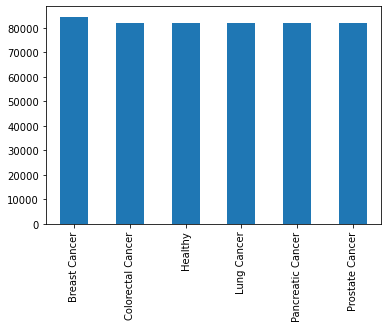

In [10]:
countplot('Cancer') # Almost equal sizes for the cancer types and healthy


In [24]:
df.iloc[:, 1:4]

,uniprot,meanAbu,Cancer
0,A0A075B6H9,1.160140e+04,Lung Cancer
1,A0A075B6I0,3.827467e+03,Lung Cancer
2,A0A075B6I1,1.141158e+05,Lung Cancer
3,A0A075B6I7,4.293525e+03,Lung Cancer
4,A0A075B6J1,5.969786e+03,Lung Cancer
...,...,...,...
614245,Q9Y6L6,7.580687e+03,Healthy
614246,Q9Y6N7,5.907860e+04,Healthy
614247,Q9Y6R7,5.091396e+06,Healthy
614248,Q9Y6Y9,1.520328e+04,Healthy


In [32]:
new = df.iloc[:, 1:4].groupby(['Cancer', 'uniprot']).size()

In [33]:
new

Cancer           uniprot   
Breast Cancer    A0A075B6H9    31
                 A0A075B6I0    31
                 A0A075B6I1    31
                 A0A075B6I7    31
                 A0A075B6J1    31
                               ..
Prostate Cancer  Q9Y6L6        30
                 Q9Y6N7        30
                 Q9Y6R7        30
                 Q9Y6Y9        30
                 Q9Y6Z7        30
Length: 16380, dtype: int64

In [37]:
df.Cancer.value_counts()

Breast Cancer        84630
Lung Cancer          81900
Pancreatic Cancer    81900
Colorectal Cancer    81900
Healthy              81900
Prostate Cancer      81900
Name: Cancer, dtype: int64

In [90]:
not any(df.uniprot.value_counts()!=225) 

True

<AxesSubplot:>

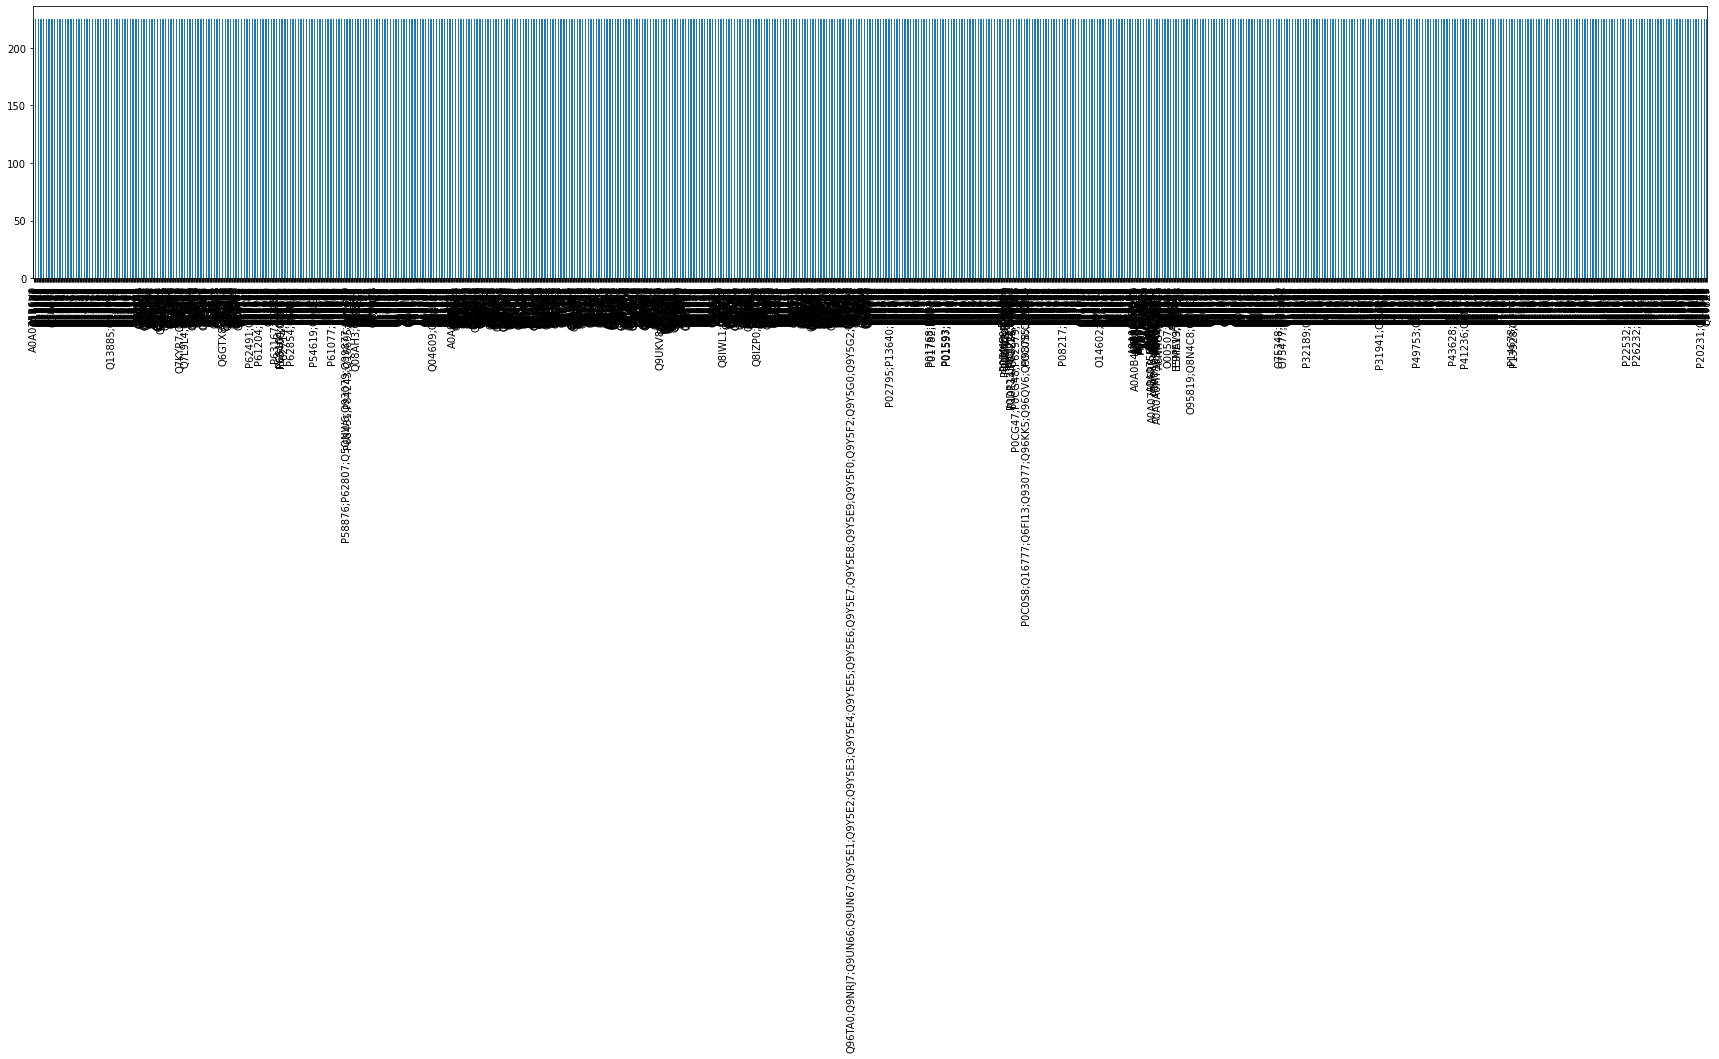

In [74]:
df.uniprot.value_counts().plot(figsize=(30, 5), kind='bar')

In [45]:
# 622 Proteins have 4 samples per Group, 1271 Proteins have 2 samples per Group
df.loc[df.duplicated(), :]
# no duplicates

,R.FileName,uniprot,meanAbu,Cancer


In [ ]:
import seaborn as sns

h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df,
            annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True),
            xticklabels=h_labels, yticklabels=h_labels,
            ax=ax)